In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

/Users/muthukrishna/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
len(test_labels)

10000

In [6]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2538 - acc: 0.9263
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.1019 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0665 - acc: 0.9799
Epoch 4/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0478 - acc: 0.9857
Epoch 5/5
10000/10000 [==============================] - 1s 53us/step


In [8]:
print test_loss, test_acc

0.06983593540440779 0.9794


In [9]:
train_images.ndim

2

In [10]:
digit = train_images[4]

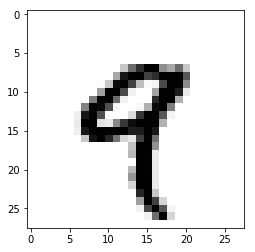

In [16]:
import matplotlib.pyplot as plt
digit = digit.reshape(28,28)
plt.imshow(digit, cmap=plt.cm.binary)